# Goal: to predict the sales price for each house. For each Id in the test set, predict the value of the SalePrice

# 1.1 import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm

# ML models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score


# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# metrics to evaluate regression model
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1.2 Load datasets

In [2]:
train_df=pd.read_csv('train.csv') # contains features and target variable (SalePrice)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
target=train_df[['Id','SalePrice']] # target features is sliced from train.csv
target.head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [4]:
train_df1=pd.read_csv('EDA_train_df1.csv') # EDA completed file from train.csv
train_df1=train_df1.iloc[:,1:] 
train_df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
full_df1=pd.read_csv('EDA_full_df1.csv') # EDA completed file from combined dataset: train.csv, test.csv
full_df1=full_df1.iloc[:,1:]
full_df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


* 4. Preprocessing
## 4.1 check distribution of target variable

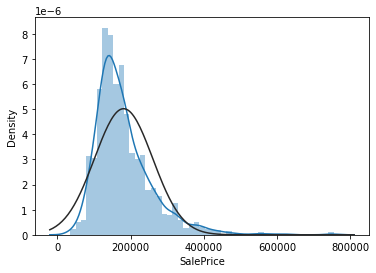

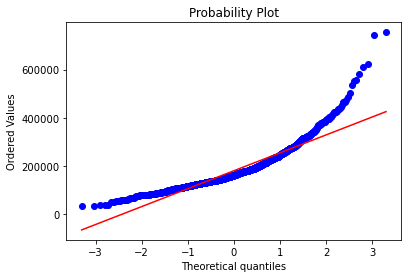

In [6]:
# histogram and probability plot of target variable
sns.distplot(target['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(target['SalePrice'], plot=plt)

## SalePrice is not normally distributed, and had positive skewness. So, apply log transformation

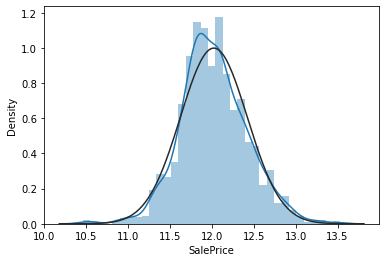

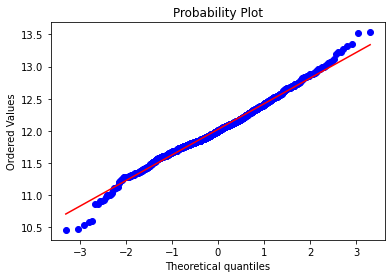

In [7]:
# apply log transformation to target variable to make normally distributed
target['SalePrice']=np.log(target['SalePrice'])

# check if log transformation improved histogram and prob distribution
sns.distplot(target['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(target['SalePrice'], plot=plt)

## Yes, target variable is normally distributed........

## Similarly, check distribution of SalePrice from train_df1

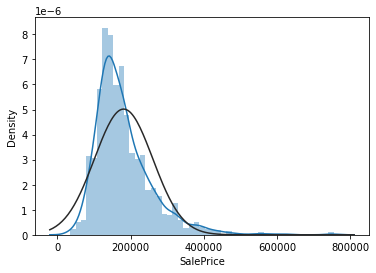

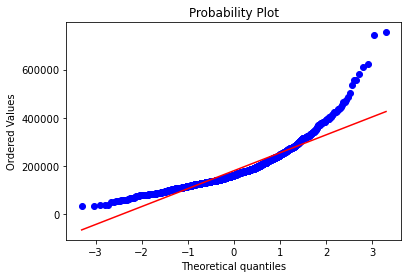

In [8]:
# histogram and probability plot of target variable
sns.distplot(train_df1['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(train_df1['SalePrice'], plot=plt)

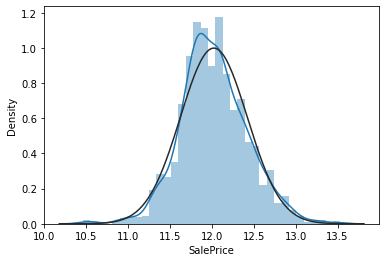

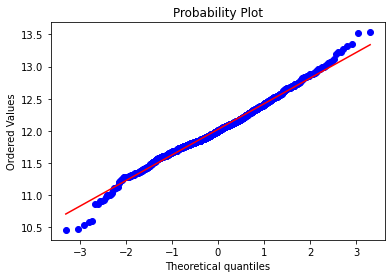

In [9]:
# apply log transformation to target variable to make normally distributed
train_df['SalePrice']=np.log(train_df['SalePrice'])

# check if log transformation improved histogram and prob distribution
sns.distplot(train_df['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(train_df['SalePrice'], plot=plt)

# 4.2 how about distribution of key features? GrLivArea from full_df1

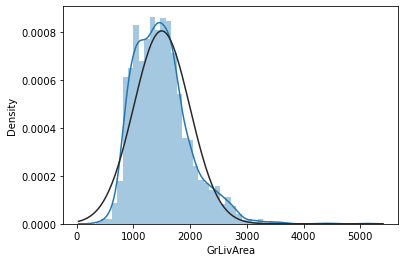

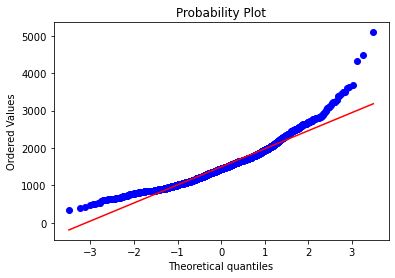

In [10]:
sns.distplot(full_df1['GrLivArea'], fit=norm);
fig=plt.figure()
res=stats.probplot(full_df1['GrLivArea'], plot=plt)

## GrLivArea is not normally distributed, and had positive skewness. So, apply log transformation

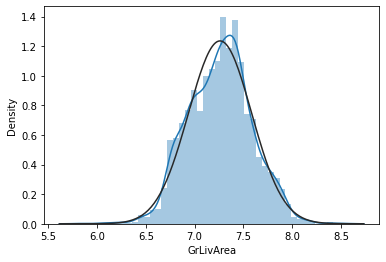

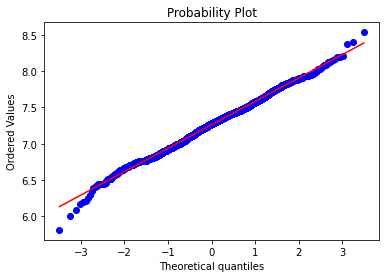

In [11]:
# apply log transformation to variable to make normally distributed
full_df1['GrLivArea'] = np.log(full_df1['GrLivArea'])

# check if log transformation improved histogram and prob distribution
sns.distplot(full_df1['GrLivArea'], fit=norm)
fig=plt.figure()
res=stats.probplot(full_df1['GrLivArea'], plot=plt)

## Now, GrLivArea is normally distributed

## 4.2.1 how about distribution of key features? GrLivArea from train_df1

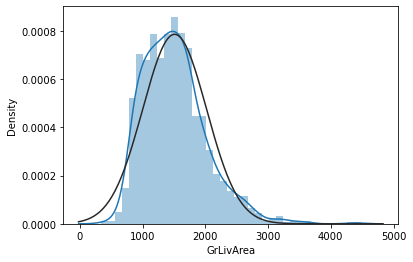

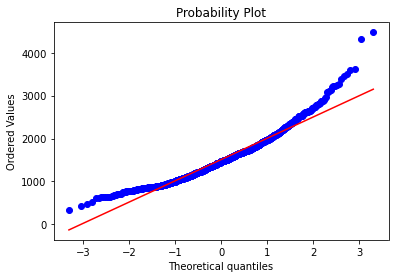

In [12]:
sns.distplot(train_df1['GrLivArea'], fit=norm);
fig=plt.figure()
res=stats.probplot(train_df1['GrLivArea'], plot=plt)

### GrLivArea is not normally distributed, and had positive skewness. So, apply log transformation

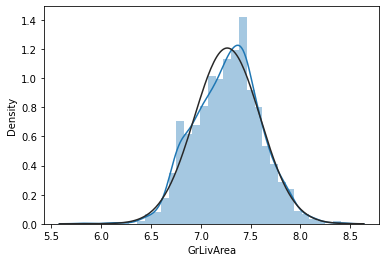

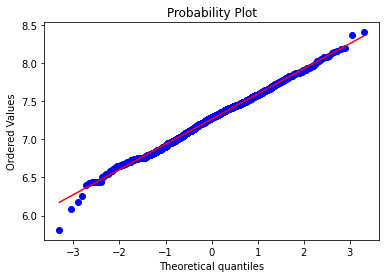

In [13]:
# apply log transformation to variable to make normally distributed
train_df1['GrLivArea'] = np.log(train_df1['GrLivArea'])

# check if log transformation improved histogram and prob distribution
sns.distplot(train_df1['GrLivArea'], fit=norm)
fig=plt.figure()
res=stats.probplot(train_df1['GrLivArea'], plot=plt)

## 4.3 how about distribution of key features? TotalBsmtSF?

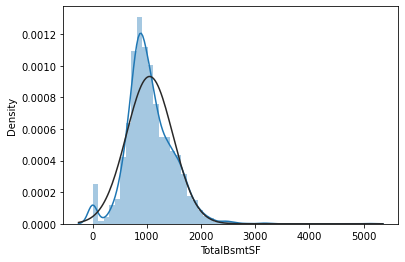

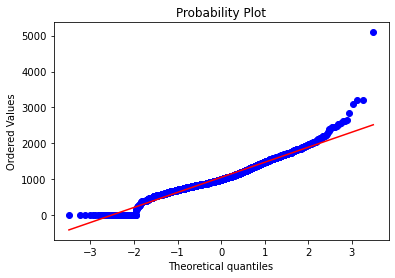

In [14]:
sns.distplot(full_df1['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(full_df1['TotalBsmtSF'], plot=plt)

### TotalBsmtSF is not normally distributed had positive skewness. BUT starts with 0 (houses without basement); 0 doesn't allow log transformation;

In [15]:
full_df1.replace([np.inf, -np.inf], 1, inplace=True)

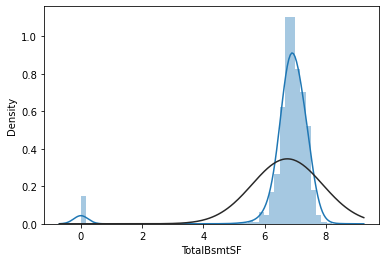

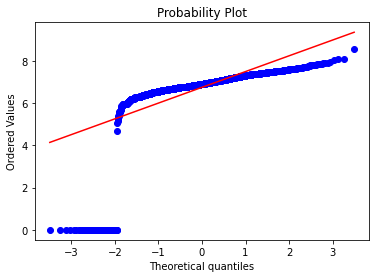

In [16]:
# apply log transformation to variable to make normally distributed
full_df1['TotalBsmtSF']=np.log(full_df1['TotalBsmtSF'])

# check if log transformation improved histogram and prob distribution
sns.distplot(full_df1['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(full_df1['TotalBsmtSF'], plot=plt)

In [17]:
full_df1.TotalBsmtSF.isnull().sum()

0

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

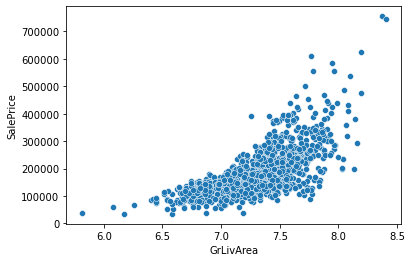

In [18]:
sns.scatterplot(x=train_df1['GrLivArea'], y=train_df1['SalePrice'])

# 4.4 Then handling categorical data of df1

In [19]:
# 3.4 Create dummy variables to categorical variables
dummies=pd.get_dummies(full_df1)
dummies.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
#check if column contains infinite value, replaced the +/-inf values into nan's and droped rows with nan's
dummies.replace([np.inf, -np.inf], 1, inplace=True)
dummies.dropna()
dummies.shape

(2904, 220)

In [21]:
# check if any missing values in features after preprocessing
dummies.isnull().sum().sort_values(ascending=False)

Id                       0
Exterior2nd_Other        0
Exterior1st_Wd Sdng      0
Exterior1st_WdShing      0
Exterior2nd_AsbShng      0
                        ..
Neighborhood_OldTown     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
SaleCondition_Partial    0
Length: 220, dtype: int64

# 4.5 Breaking dummies into train and test datasets

In [22]:
dummies=dummies.sort_values(by='Id')
dummies.head(100)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,9765,6,8,1993,1993,310.0,0.0,370.0,...,0,0,0,1,0,0,0,0,1,0
96,97,20,10264,7,5,1999,1999,1162.0,0.0,426.0,...,0,0,0,1,0,0,0,0,1,0
97,98,20,10921,4,5,1965,1965,520.0,0.0,440.0,...,0,0,0,1,0,0,0,0,1,0
98,99,30,10625,5,5,1920,1950,108.0,0.0,350.0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
count = np.isinf(dummies).values.sum()
count

0

In [24]:
train_data_ML=dummies.loc[dummies.Id<=1460]
train_data_ML.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1452,1456,60,7917,6,5,1999,2000,0.0,0.0,953.0,...,0,0,0,1,0,0,0,0,1,0
1453,1457,20,13175,6,6,1978,1988,790.0,163.0,589.0,...,0,0,0,1,0,0,0,0,1,0
1454,1458,70,9042,7,9,1941,2006,275.0,0.0,877.0,...,0,0,0,1,0,0,0,0,1,0
1455,1459,20,9717,5,6,1950,1996,49.0,1029.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1460,20,9937,5,6,1965,1965,830.0,290.0,136.0,...,0,0,0,1,0,0,0,0,1,0


# 4.6 Establish test dataset, test numpy array for ML models

In [25]:
test_data_ML=dummies.loc[dummies.Id>=1461]
test_data_ML.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1457,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1458,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
1459,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
1460,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
1461,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
test_array=test_data_ML.values
print(test_array[:20])

[[1.4610e+03 2.0000e+01 1.1622e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4620e+03 2.0000e+01 1.4267e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4630e+03 6.0000e+01 1.3830e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [1.4780e+03 2.0000e+01 1.1520e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4790e+03 2.0000e+01 1.4122e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4800e+03 2.0000e+01 1.4300e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]]


In [27]:
print(dummies.shape)
print(train_data_ML.shape)
print(test_data_ML.shape)
print(test_array.shape)

(2904, 220)
(1457, 220)
(1447, 220)
(1447, 220)


## Adding log transformed SalePrice col from target to train_df1_ML

In [28]:
train_data=pd.merge(train_data_ML, target, on='Id')
train_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,1,0,0,0,0,1,0,12.247694
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,1,0,0,0,0,1,0,12.109011
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,1,0,0,0,0,1,0,12.317167
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,1,1,0,0,0,0,0,11.849398
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,1,0,0,0,0,1,0,12.429216


In [29]:
train_data.shape

(1457, 221)

# 5. Train Model
## 5.1 Separating features (X) and target variable (y)

# split train_data into X, y

In [30]:
X= train_data.iloc[:,:-1].values
y= train_data['SalePrice'].values

In [31]:
X.shape

(1457, 220)

In [32]:
y.shape

(1457,)

# 5.2 Train, Test, split data

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1019, 220)
(438, 220)
(1019,)
(438,)


# 5.3 Feature Scaling

In [34]:
scaling=MinMaxScaler(feature_range=(0,1))
X_train=scaling.fit_transform(X_train) # Fit and transform MinMaxScaler to X_train
X_test=scaling.transform(X_test) # trainform scaling to X_test
test_array=scaling.transform(test_array) # transform MinMaxScaler to test_array

# 5.4.1 Multiple Linear Regression model
y= a1x1 + a2x2 + a3x3+....+b (linear reg minimizes a loss function (OLS) while choosing coefficients for fitting the model in sklearn.

In [35]:
# instantiate linearregression
lr=LinearRegression()
# fit leniar regression on training data
lr.fit(X_train, y_train)
# predict on training data
y_trpred=lr.predict(X_train)
# predict on test data
y_pred=lr.predict(X_test)

print('R^2: {}'.format(lr.score(X_test, y_test)))
      
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: {}".format(rmse))

R^2: -8.145738372417883e+20
Root Mean Square Error: 11235213346.399387


In [36]:
y_pred[:10]

array([11.82887268, 11.95840454, 11.4651947 , 11.81211853, 12.61810303,
       11.92497253, 12.08093262, 11.75059509, 11.88108826, 12.19816589])

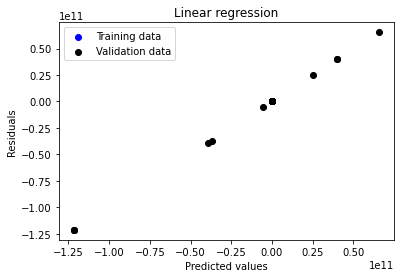

In [37]:
#plot between predicted values and residuals
plt.scatter(y_trpred, y_trpred - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

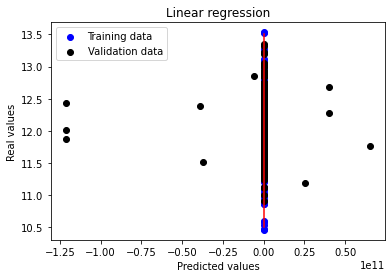

In [38]:
# Plot predictions - Real values
plt.scatter(y_trpred, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# 5.4.2 Five fold cross validation
Cross-validation is a vital step in evaluating a model.

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
# compute 5-fold cross-val scores
cv_scores=cross_val_score(lr, X, y, cv=5)

print("5-fold cross val scores (i.e R^2 values):{}". format(cv_scores))
print('Mean cross val score or mean R^2 value: {}'.format(np.mean(cv_scores)))

5-fold cross val scores (i.e R^2 values):[0.91369528 0.90455213 0.90121937 0.91505553 0.90773841]
Mean cross val score or mean R^2 value: 0.9084521432489213


### Large coefficients can lead to overfitting of Linear Regression; So, Regularization can penalize overfitting by handling colinearity.

# 5.5 Ridge Regression
Parameter is alpha like k in KNN (alpha=0 leads to overfitting, very high alpha leads to underfitting)

In [40]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('Best alpha',alpha)

# predict on training data
y_trpred=ridge.predict(X_train)
# predict on test data
y_pred=ridge.predict(X_test)
print('R^2 value:{}'.format(ridge.score(X_test, y_test)))
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: {}".format(rmse))

Best alpha 1.0
R^2 value:0.92668902660498
Root Mean Square Error: 0.10658610404310023


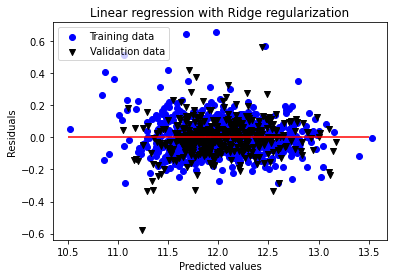

In [41]:
# Plot residuals
plt.scatter(y_trpred, y_trpred - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

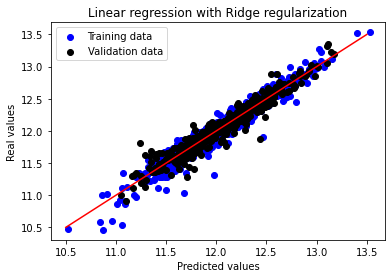

In [42]:
# Plot predictions - Real values
plt.scatter(y_trpred, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# 5.6 Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0005, normalize=True)
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
print('R^2 value:{}'.format(lasso.score(X_test, y_test)))

R^2 value:0.9137604816751057


# 5.7 Predictions

In [44]:
test_data_ML.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1457,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1458,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
1459,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
1460,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
1461,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
test_array[:10]

array([[1.00137174, 0.        , 0.04745799, ..., 0.        , 1.        ,
        0.        ],
       [1.00205761, 0.        , 0.05983122, ..., 0.        , 1.        ,
        0.        ],
       [1.00274348, 0.23529412, 0.05778695, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.00617284, 0.23529412, 0.03239493, ..., 0.        , 1.        ,
        0.        ],
       [1.00685871, 0.        , 0.04069365, ..., 0.        , 1.        ,
        0.        ],
       [1.00754458, 0.        , 0.03238558, ..., 0.        , 1.        ,
        0.        ]])

In [46]:
#predictied values
new_pred=ridge.predict(test_array)
new_pred

array([11.68452782, 11.95847681, 12.09763722, ..., 12.00158497,
       11.64435366, 12.31469936])

In [47]:
# predicted values dataframe
predicted_data=pd.DataFrame({'Id':test_data_ML['Id'],
                            'SalePrice_Predicted':new_pred})
predicted_data

,Id,SalePrice_Predicted
1457,1461,11.684528
1458,1462,11.958477
1459,1463,12.097637
1460,1464,12.202479
1461,1465,12.208169
...,...,...
2899,2915,11.303629
2900,2916,11.286478
2901,2917,12.001585
2902,2918,11.644354


In [48]:
# convert predicted values to exponential, make dataframe
predicted_data=pd.DataFrame({'Id':test_data_ML['Id'],
                            'SalePrice_Predicted':np.exp(new_pred)})
predicted_data


,Id,SalePrice_Predicted
1457,1461,118720.565612
1458,1462,156135.080009
1459,1463,179447.365623
1460,1464,199282.590270
1461,1465,200419.640299
...,...,...
2899,2915,81115.465252
2900,2916,79736.147521
2901,2917,163012.957327
2902,2918,114045.601511


<AxesSubplot:xlabel='SalePrice_Predicted', ylabel='Count'>

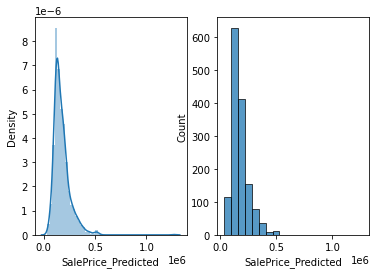

In [49]:
fig, ax =plt.subplots(1,2)
sns.distplot(predicted_data.SalePrice_Predicted, kde=True, ax=ax[0])
sns.histplot(predicted_data.SalePrice_Predicted, bins=20, ax=ax[1])

In [50]:
predicted_data.to_csv('Test_data_predicted_saleprice.csv')